In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
training_df = pd.read_csv('/content/drive/MyDrive/Πτυχιακή/Code/argmining-21-keypoint-analysis-sharedtask-code/data/training_df.csv')
valid_df = pd.read_csv('/content/drive/MyDrive/Πτυχιακή/Code/argmining-21-keypoint-analysis-sharedtask-code/data/valid_df.csv')

In [ ]:
training_df.key_point.value_counts()

key_point
People should be allowed to do whatever they want to their own bodies       132
Alcohol and tobacco are more harmful drugs yet remain legal                 131
Cannabis is safe/healthy/pain-relief                                        130
If cannabis was legalized it could be regulated                             128
Cannabis is financially beneficial                                          127
                                                                           ... 
The government is essential to protect the rights of citizens                64
Religions are immoral and people should not follow them                      61
Intellectual property restricts access to important information/products     61
Men are better suited to combat roles than women                             59
The terminally ill would benefit from assisted suicide                       58
Name: count, Length: 207, dtype: int64

In [5]:
valid_df

,arg_id,key_point_id,label,argument,topic,stance,key_point
0,arg_4_121,kp_4_5,1,"A real education is about giving students the tools to learn, think, and express themselves; dictating to them what to wear sends a strong message that we don't trust them to think on their own.",We should abandon the use of school uniform,1,School uniform is harming the student's self expression
1,arg_4_122,kp_4_5,1,children express themselves through the clothes they wear and should be able to do this at school,We should abandon the use of school uniform,1,School uniform is harming the student's self expression
2,arg_4_123,kp_4_5,1,"children should be able to dress as they wish, within reason, at school rather than being restricted from expressing themselves through their clothes.",We should abandon the use of school uniform,1,School uniform is harming the student's self expression
3,arg_4_124,kp_4_5,1,children should be allowed to express themselves,We should abandon the use of school uniform,1,School uniform is harming the student's self expression
4,arg_4_126,kp_4_5,1,freedom of expression extends to the right to choose one's own clothing and a school uniform prevents this choice.,We should abandon the use of school uniform,1,School uniform is harming the student's self expression
...,...,...,...,...,...,...,...
3453,arg_15_218,kp_15_7,1,we should end affirmative action because students who can't do the work are being admitted into programs they can't handle accedimically and thus fail out of the program.,We should end affirmative action,1,Affirmative action reduces quality
3454,arg_15_219,kp_15_7,0,we should end affirmative action because this approach give an unfair advantage to certain groups of people. all people should earn rewards based on their production.,We should end affirmative action,1,Affirmative action reduces quality
3455,arg_15_223,kp_15_7,0,we should end it so that every persons are equal,We should end affirmative action,1,Affirmative action reduces quality
3456,arg_15_225,kp_15_7,0,we should select people based on their merit only. affirmative action is discriminatory.,We should end affirmative action,1,Affirmative action reduces quality


#To how many KPs does each argument belong to? (the majority: 1 KP per argument)

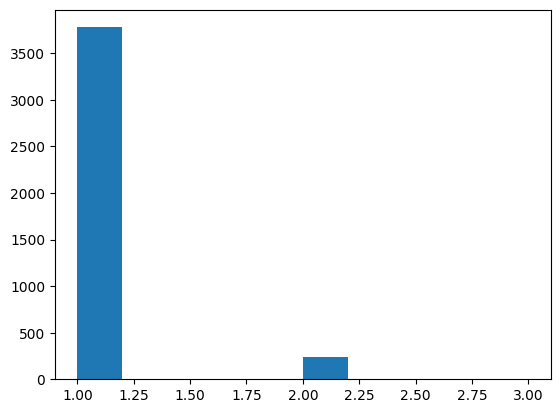

In [ ]:
keypoints_per_arg = [x[1] for x in training_df[training_df.label == 1].arg_id.value_counts().to_dict().items()]
plt.hist(keypoints_per_arg)
plt.show()

# How many aguments are attached to each KP on average? : (5-20 args oer KP)

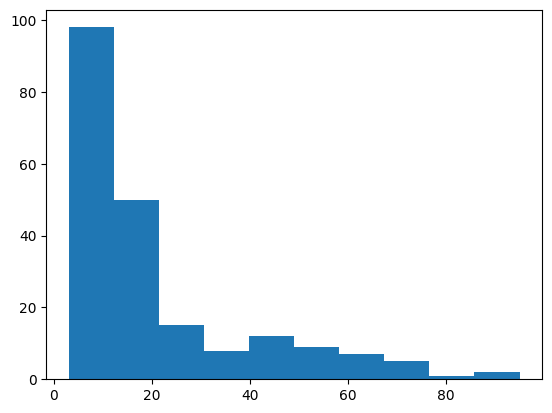

In [ ]:
args_per_keypoints = [x[1] for x in training_df[training_df.label == 1].key_point_id.value_counts().to_dict().items()]
plt.hist(args_per_keypoints)
plt.show()

-------------

### Creating data for ContrastiveLoss:

In [ ]:
training_df.head()

,arg_id,key_point_id,label,argument,topic,stance,key_point
0,arg_0_0,kp_0_0,0,`people reach their limit when it comes to their quality of life and should be able to end their suffering. this can be done with little or no suffering by assistance and the person is able to say good bye.,Assisted suicide should be a criminal offence,-1,Assisted suicide gives dignity to the person that wants to commit it
1,arg_0_1,kp_0_0,0,"A patient should be able to decide when they have had enough ""care"".",Assisted suicide should be a criminal offence,-1,Assisted suicide gives dignity to the person that wants to commit it
2,arg_0_2,kp_0_0,0,"a person has the right to end their suffering and if somebody takes pity on them and chooses to help, that person should not be punished.",Assisted suicide should be a criminal offence,-1,Assisted suicide gives dignity to the person that wants to commit it
3,arg_0_4,kp_0_0,0,a person should have the right to be able to choose if they want to live or die,Assisted suicide should be a criminal offence,-1,Assisted suicide gives dignity to the person that wants to commit it
4,arg_0_5,kp_0_0,0,a person should have the right to die on their own terms,Assisted suicide should be a criminal offence,-1,Assisted suicide gives dignity to the person that wants to commit it


In [ ]:
df = training_df.copy()
df['keypoint'] = df.apply(lambda x: x['topic'] + ' <SEP> ' + x['key_point'], axis=1)
df['label'] = df.label.apply(lambda x: int(x))
df[['argument', 'keypoint', 'label']].to_csv('/content/drive/MyDrive/Πτυχιακή/Code/argmining-21-keypoint-analysis-sharedtask-code/KPA_2021_shared_task/siamese-data/training_df_contrastive.csv')

df = valid_df.copy()
df['keypoint'] = df.apply(lambda x: x['topic'] + ' <SEP> ' + x['key_point'], axis=1)
df['label'] = df.label.apply(lambda x: int(x))
df[['argument', 'keypoint', 'label']].to_csv('/content/drive/MyDrive/Πτυχιακή/Code/argmining-21-keypoint-analysis-sharedtask-code/KPA_2021_shared_task/siamese-data/valid_df_contrastive.csv')

In [ ]:
df.head()

,arg_id,key_point_id,label,argument,topic,stance,key_point,keypoint
0,arg_4_121,kp_4_5,1,"A real education is about giving students the tools to learn, think, and express themselves; dictating to them what to wear sends a strong message that we don't trust them to think on their own.",We should abandon the use of school uniform,1,School uniform is harming the student's self expression,We should abandon the use of school uniform <SEP> School uniform is harming the student's self expression
1,arg_4_122,kp_4_5,1,children express themselves through the clothes they wear and should be able to do this at school,We should abandon the use of school uniform,1,School uniform is harming the student's self expression,We should abandon the use of school uniform <SEP> School uniform is harming the student's self expression
2,arg_4_123,kp_4_5,1,"children should be able to dress as they wish, within reason, at school rather than being restricted from expressing themselves through their clothes.",We should abandon the use of school uniform,1,School uniform is harming the student's self expression,We should abandon the use of school uniform <SEP> School uniform is harming the student's self expression
3,arg_4_124,kp_4_5,1,children should be allowed to express themselves,We should abandon the use of school uniform,1,School uniform is harming the student's self expression,We should abandon the use of school uniform <SEP> School uniform is harming the student's self expression
4,arg_4_126,kp_4_5,1,freedom of expression extends to the right to choose one's own clothing and a school uniform prevents this choice.,We should abandon the use of school uniform,1,School uniform is harming the student's self expression,We should abandon the use of school uniform <SEP> School uniform is harming the student's self expression


----------